# Handling Imbalanced Datasets:

* Aim to Add parameter to define Sampling Methodology
    - Sample Passed Number based on the natural Distribution of the data (Adaptive)
    - Uniform Sampling
    - OverSampling Classes with Less number of Samples(Anamoly Detection Case)
    - UnderSampling Classes with more number of Samples

# Add This to from_csv Dataloader 

In [5]:
from imblearn.over_sampling import RandomOverSampler
from fastai.dataset import get_cv_idxs

In [6]:
label_csv='train.csv'
n = len(list(open(label_csv)))-1
print(n)
val_idxs = get_cv_idxs(n,val_pct=0.3)

13000


In [7]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline

df_train=pd.read_csv('train.csv')
df_train.head()

,Image_id,Animal
0,Img-1.jpg,hippopotamus
1,Img-2.jpg,squirrel
2,Img-3.jpg,grizzly+bear
3,Img-4.jpg,ox
4,Img-5.jpg,german+shepherd


In [40]:
def plot_counter(cntr):
    labels, values = zip(*sorted(cntr.items()))
    indexes = np.arange(len(labels))
    width = 0.5
    plt.figure(figsize=(8,6))
    plt.bar(indexes, values, width)
    plt.xticks(indexes + width * 0.5, labels, rotation='vertical')
    plt.show()

In [47]:
def get_cv_idxs_sample(n,y,cv_idx=0, val_pct=0.2, seed=42):
    """ Get a list of index values for Validation set from a dataset Using Various Sampling Techniques from imblearn package
    Arguments:
        n : int, Total number of elements in the data set.
        y : labels Corresponding to the index in the data set.
        cv_idx : int, starting index [idx_start = cv_idx*int(val_pct*n)] 
        val_pct : (int, float), validation set percentage 
        seed : seed value for RandomState
        
    Returns:
        list of indexes 
    """
    
    np.random.seed(seed)
    n_val = int(val_pct*n)
    idx_start = cv_idx*n_val
    idxs = np.random.permutation(n)
    return idxs[idx_start:idx_start+n_val]

# Natural Distribution of data

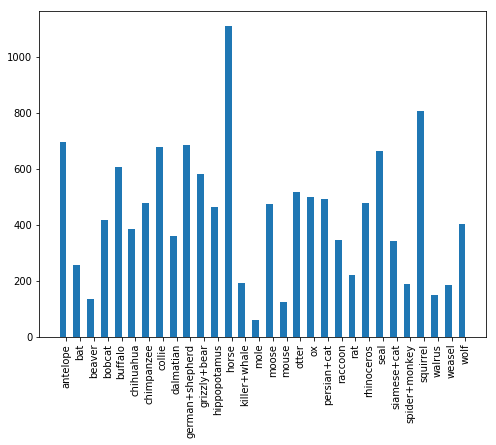

In [41]:
plot_counter(Counter(df_train['Animal']))

# Using Current Implementation of get_cv_idxs i.e Random Permutation of indicies within the validation size

* Randomly permute a sequence, or return a permuted range.



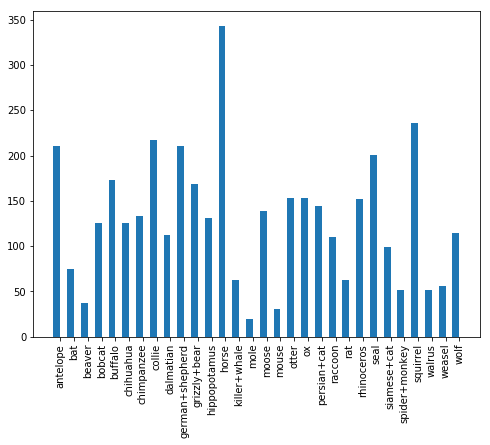

In [42]:
plot_counter(Counter(df_train['Animal'][val_idxs]))

# Generating Validation data based on sampling methods

# OverSampling 

In [45]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=100, n_features=2, n_informative=2,
                            n_redundant=0, n_repeated=0, n_classes=2,
                            n_clusters_per_class=1,
                            weights=[0.05, 0.95],
                            class_sep=0.8, random_state=0)

In [46]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_sample(X, y)
from collections import Counter
print(sorted(Counter(y_resampled).items()))

[(0, 95), (1, 95)]
